Regression with a Multi-layer Perceptron

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

Generate data

In [ ]:
n= 200
d=3
x = np.random.uniform(-1, 1, (n, d))
weights_true = np.array([[5, 1,1],[1,1,1]]).T
bias_true = np.array([1])


weights and bias

In [ ]:
y_true = (x ** 2) @ weights_true + x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')


x: (200, 3), weights: (3, 2), bias: (1,), y: (200, 2)


3D plot

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:794: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:796: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:798: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir[0] == '-':


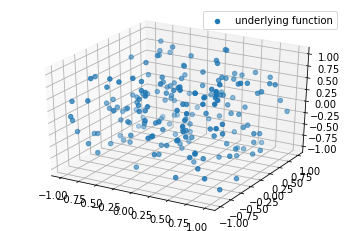

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d(x, y, y_pred=None):
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], x[:, 2], y, label='underlying function')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], x[:, 2], y_pred, label='our function')
  plt.legend()

plot_3d(x, y_true)

In [ ]:
import pandas as pd
df_x = pd.DataFrame(x)
df_y = pd.DataFrame(y_true)

Prediction function linear

In [ ]:
class MSE:
  def __call__(self, y_pred, y_true):
    # Calculating the MSE
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_pred - y_true) ** 2).mean()

  def backward(self):
    # Derivative of MSE
    n = self.y_true.shape[0]
    self.gradient = 2. * (self.y_pred - self.y_true) / n
    return self.gradient

class Linear:
  def __init__(self, input_dim: int, num_hidden: int = 1):
    self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(num_hidden)
  
  def __call__(self, x):
    # Forward Propagation
    self.x = x
    output = x @ self.weights + self.bias
    return output

  def backward(self, gradient):
    # Backward propagation
    self.weights_gradient = self.x.T @ gradient
    self.bias_gradient = gradient.sum(axis=0)
    self.x_gradient = gradient @ self.weights.T
    return self.x_gradient

  def update(self, lr):
    # Updating the wieghts and bias
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient

Add non-linearity: ReLU

In [ ]:
class Relu:
    def __call__(self, input_):
        self.input_ = input_
        self.output = np.clip(self.input_, 0, None)
        return self.output
    def backward(self , output_gradient):
        self.input_gradient = (self.input_ > 0 ) * output_gradient
        return self.input_gradient

Train non-linear model

In [ ]:
class Model:
  def __init__(self, input_dim, num_hiddenlayer1, num_hiddenlayer2):
    self.linear1 = Linear(input_dim, num_hiddenlayer1)
    self.relu1 = Relu()
    self.linear2 = Linear(num_hiddenlayer1, num_hiddenlayer2)
    self.relu2 = Relu()
    self.linear3 = Linear(num_hiddenlayer2 , 2)
  
  def __call__(self, x):
    l1 = self.linear1(x)
    r = self.relu1(l1)

    l2 = self.linear2(r)
    r = self.relu2(l2)

    l3 = self.linear3(r)
    return l3
  
  def backward(self, output_gradient):
    linear3_gradient = self.linear3.backward(output_gradient)
    relu2_gradient = self.relu2.backward(linear3_gradient)

    linear2_gradient = self.linear2.backward(relu2_gradient)
    relu1_gradient = self.relu1.backward(linear2_gradient)

    linear1_gradient = self.linear1.backward(relu1_gradient)
    return linear1_gradient

  def update(self, lr):

    self.linear3.update(lr)
    self.linear2.update(lr)
    self.linear1.update(lr)


Calculate the loss value

In [ ]:
loss = MSE()
model = Model(d, 10, 50)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)
loss_gradient = loss.backward()
model.backward(loss_gradient)
model.update(0.1)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)

15.283762162351355
21.64558886807799


build model and plot the data

In [ ]:
from typing import Callable

def fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)

Epoch 0, loss 21.64558886807799
Epoch 1, loss 15.555892438324655
Epoch 2, loss 10.256647247264645
Epoch 3, loss 4.950401351126649
Epoch 4, loss 3.8189309022523643
Epoch 5, loss 8.543183667280575
Epoch 6, loss 4.129076813001468
Epoch 7, loss 2.2726174295524197
Epoch 8, loss 5.345221889372994
Epoch 9, loss 1.1915745489084293
Epoch 10, loss 1.7068773995957793
Epoch 11, loss 3.8369980763234754
Epoch 12, loss 9.249052139494578
Epoch 13, loss 7.7873672304833965
Epoch 14, loss 6.71796315789398
Epoch 15, loss 5.710002761550023
Epoch 16, loss 4.444075340448244
Epoch 17, loss 3.00228606997748
Epoch 18, loss 1.9995775124484254
Epoch 19, loss 1.4071658007843713


/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:794: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:796: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:798: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir[0] == '-':


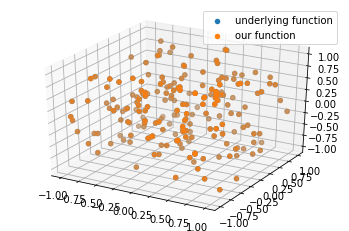

In [ ]:
fit(x, y_true, model=model, loss=loss, lr=0.1, num_epochs=20)
plot_3d(x, y_true,y_pred)